In [22]:
import logomaker
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from learnMSA.msa_hmm.Initializers import background_distribution

<ipython-input-33-e4635a1c7933>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dist = np.array(dist, dtype=np.float)


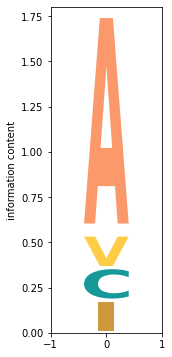

In [33]:
msa_column = "AIAAVAAACA"
logomaker_alphabet = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]
dist = [msa_column.count(aa) for aa in logomaker_alphabet]
dist = np.array(dist, dtype=np.float)
dist /= len(msa_column)

background = background_distribution[:20]

information_content = tf.keras.losses.KLDivergence(reduction=tf.keras.losses.Reduction.NONE)(dist, background)

information_content_df = pd.DataFrame((information_content * dist).numpy()[np.newaxis], 
                                      columns=logomaker_alphabet)

fig, ax = plt.subplots()
ax.figure.set_size_inches(2, 6)

# create Logo object
logo = logomaker.Logo(information_content_df,
                   color_scheme='skylign_protein',
                   vpad=.1,
                   width=.8,
                   ax=ax)

# style using Axes methods
logo.ax.set_ylabel('information content')
logo.ax.set_xlim([-1, len(information_content_df)])

plt.savefig("../plots/aadist.pdf", format="pdf", bbox_inches="tight")